## Training a classifier

The expert observations will be tested in three classifers: Extra Tress, Random Forest and Decision Tree. At the end the best calssifier will be used on the main algortihm (Expert iterations).

In [1]:
#Importing libraries
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Uploading the data getting from assigment 1
dfOXO = pd.read_csv("/Users/davidalbuja/Documents/Essex/Spring/Data Science and Decision Making/Assigment 2/dataset_assigment1.csv")

#Print the data
dfOXO

,Unnamed: 0,pos: 0,pos: 1,pos: 2,pos: 3,pos: 4,pos: 5,pos: 6,pos: 7,pos: 8,Best Move
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,4
2,2,1,0,0,0,2,0,0,0,0,2
3,3,1,0,1,0,2,0,0,0,0,1
4,4,1,2,1,0,2,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
17493,17493,2,0,1,0,2,0,1,0,0,8
17494,17494,2,0,1,0,2,0,1,0,1,7
17495,17495,2,0,1,0,2,0,1,2,1,1
17496,17496,2,1,1,0,2,0,1,2,1,5


In [3]:
#Split the features and the target value

features = ["pos: 0", "pos: 1", "pos: 2", "pos: 3", "pos: 4", "pos: 5", "pos: 6","pos: 7","pos: 8",]
outcome = ["Best Move"]

X = dfOXO[features].copy()
y = dfOXO[outcome].copy()

In [38]:
#Split into training and test set

#train, test = train_test_split(dfOXO,0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#Creating a function for plotting the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Extra Trees Classifier

In [4]:
#Building a classifier and a dummy classifier.

clf = ExtraTreesClassifier(n_estimators=1000, max_depth=6)
#clf = ExtraTreesClassifier(n_estimators=1000)

dummy_clf = DummyClassifier() # generates predictions by respecting the training set's class distribution 

scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf, X, y, cv=10, scoring=make_scorer(acc))

print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_s

ACC: 0.73 +/- 0.01
Dummy ACC: 0.11 +/- 0.01


In [5]:
#Train the classifier on the whole dataset

clf = ExtraTreesClassifier(n_estimators=20000)
clf.fit(X,y)

print(acc(y,clf.predict(X)))

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7654589095896673


/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

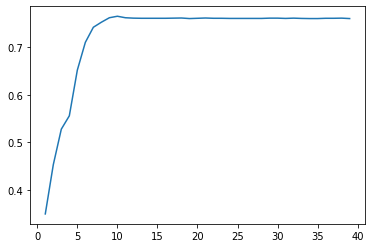

In [55]:
#Plotting accuracy Extra Decision tree

max_depth_range = list(range(1,40))

accuracy = []

for depth in max_depth_range:
    clf = ExtraTreesClassifier(n_estimators=1000, max_depth=depth)
    clf.fit(X_train,y_train)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_range,accuracy)
plt.show()

In [7]:
# Compute confusion matrix (Extra Decision tree)

y_pred = clf.predict(X)

cnf_matrix = confusion_matrix(y, y_pred) 
np.set_printoptions(precision=2)

cnf_matrix

array([[1929,    0,    1,    0,   60,    2,    0,    1,    0],
       [ 136, 1389,  245,    0,   27,   11,    7,  138,    0],
       [ 251,    9, 1521,    9,   36,   11,   72,   22,    0],
       [ 149,    5,  195, 1543,   33,    0,    9,   15,    0],
       [ 772,   15,    2,    2, 1203,    0,    4,    2,    0],
       [  44,  121,   26,  203,   14, 1473,    6,   31,    0],
       [ 240,   18,  394,   52,   36,   15, 1153,   10,    0],
       [  44,   80,   39,  109,    5,    6,    4, 1638,    0],
       [  90,    4,   10,    6,   20,  111,    0,  125, 1545]])

In [8]:
#Precision and recall of (Extra Decision tree)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.97      0.68      1993
           1       0.85      0.71      0.77      1953
           2       0.63      0.79      0.70      1931
           3       0.80      0.79      0.80      1949
           4       0.84      0.60      0.70      2000
           5       0.90      0.77      0.83      1918
           6       0.92      0.60      0.73      1918
           7       0.83      0.85      0.84      1925
           8       1.00      0.81      0.89      1911

    accuracy                           0.77     17498
   macro avg       0.81      0.77      0.77     17498
weighted avg       0.81      0.77      0.77     17498



Normalized confusion matrix


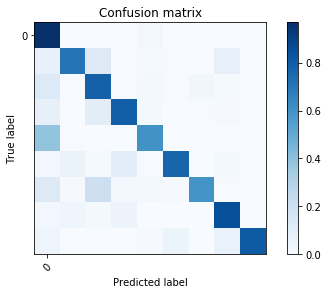

In [9]:
# Plot normalized confusion matrix (Extra Decision tree)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True, title='Confusion matrix')

### Random Forest

In [40]:
#Building a classifier and a dummy classifier.

clf2 = RandomForestClassifier(n_estimators=1000, criterion='gini')

dummy_clf2 = DummyClassifier() # generates predictions by respecting the training set's class distribution 

scores2 = cross_val_score(clf2, X, y, cv=10,scoring=make_scorer(acc))
dummy_scores2 = cross_val_score(dummy_clf2, X, y, cv=10, scoring=make_scorer(acc))

print("ACC: %0.2f +/- %0.2f" % (scores2.mean(), scores2.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores2.mean(), dummy_scores2.std()))

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_s

ACC: 0.75 +/- 0.01
Dummy ACC: 0.11 +/- 0.00


/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

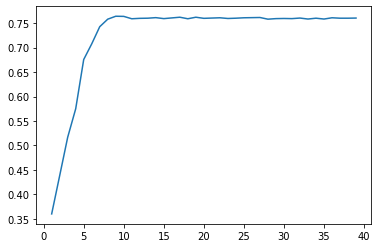

In [56]:
#Plotting accuracy random forest (Extra Decision tree)

max_depth_range = list(range(1,40))

accuracy = []

for depth in max_depth_range:
    clf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=depth)
    clf.fit(X_train,y_train)
    
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_range,accuracy)
plt.show()

In [41]:
#Train the classifier on the whole dataset

clf2 = RandomForestClassifier(n_estimators=20000)
clf2.fit(X,y)

print(acc(y,clf2.predict(X)))

/Users/davidalbuja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7654589095896673


In [42]:
# Compute confusion matrix (random forest)

y_pred2 = clf2.predict(X)

cnf_matrix2 = confusion_matrix(y, y_pred2) 
np.set_printoptions(precision=2)

cnf_matrix2

array([[1928,    0,    1,    0,   60,    2,    0,    2,    0],
       [ 136, 1389,  245,    0,   27,   11,    7,  138,    0],
       [ 251,    9, 1515,   13,   38,   11,   72,   22,    0],
       [ 149,    5,  191, 1542,   35,    0,    9,   18,    0],
       [ 772,   15,    0,    0, 1203,    4,    4,    2,    0],
       [  44,  121,   26,  203,   10, 1475,    7,   31,    1],
       [ 240,   18,  394,   52,   36,   14, 1154,   10,    0],
       [  43,   80,   39,  106,    5,    6,    4, 1642,    0],
       [  90,    4,   10,    6,   20,  110,    0,  125, 1546]])

In [43]:
#Precision and recall of random forest
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.53      0.97      0.68      1993
           1       0.85      0.71      0.77      1953
           2       0.63      0.78      0.70      1931
           3       0.80      0.79      0.80      1949
           4       0.84      0.60      0.70      2000
           5       0.90      0.77      0.83      1918
           6       0.92      0.60      0.73      1918
           7       0.83      0.85      0.84      1925
           8       1.00      0.81      0.89      1911

    accuracy                           0.77     17498
   macro avg       0.81      0.77      0.77     17498
weighted avg       0.81      0.77      0.77     17498



Normalized confusion matrix


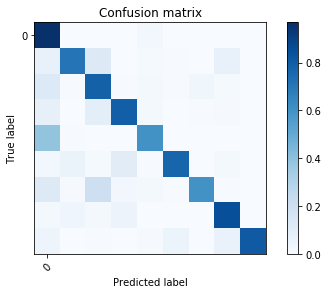

In [44]:
# Plot normalized confusion matrix (random forest)
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=range(len(set(y))), normalize = True, title='Confusion matrix')

### Decision tree

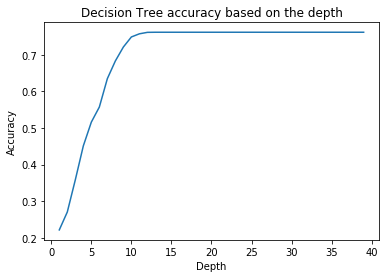

In [51]:
#Plotting accuracy of decision tree

max_depth_range = list(range(1,40))

accuracy = []

for depth in max_depth_range:
    clf4 = DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf4.fit(X_train,y_train)
    
    score4 = clf4.score(X_test, y_test)
    accuracy.append(score4)

plt.plot(max_depth_range,accuracy)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree accuracy based on the depth')
plt.show()

In [52]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(max_depth=11)

# Train Decision Tree Classifer
clf4 = clf4.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_train = clf4.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf4.predict(X_test)

# Model Accuracy/recall/precisio train set
print(classification_report(y_train, y_pred_train))

# Model Accuracy/recall/precisio test set
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       0.53      0.97      0.69      1591
           1       0.84      0.70      0.76      1562
           2       0.74      0.71      0.73      1561
           3       0.67      0.87      0.76      1565
           4       0.85      0.60      0.70      1582
           5       0.89      0.76      0.82      1526
           6       0.92      0.60      0.73      1557
           7       0.87      0.77      0.82      1506
           8       0.93      0.88      0.90      1548

    accuracy                           0.76     13998
   macro avg       0.80      0.76      0.77     13998
weighted avg       0.80      0.76      0.77     13998

              precision    recall  f1-score   support

           0       0.52      0.96      0.68       402
           1       0.85      0.75      0.80       391
           2       0.75      0.70      0.73       370
           3       0.64      0.86      0.74       384
           4       0.84 

In [53]:
# Compute confusion matrix (Decision tree 70-30)

y_pred4 = clf4.predict(X)

cnf_matrix4 = confusion_matrix(y, y_pred4) 
np.set_printoptions(precision=2)

cnf_matrix4

array([[1929,    0,    1,    0,   60,    2,    0,    1,    0],
       [ 136, 1392,  118,  127,   27,   11,    7,  135,    0],
       [ 251,    9, 1374,  159,   36,   15,   70,   16,    1],
       [ 149,    5,   57, 1689,   25,    0,    9,   15,    0],
       [ 772,   15,    2,   12, 1193,    0,    4,    2,    0],
       [  44,  129,   19,  214,   10, 1469,    3,   29,    1],
       [ 240,   18,  248,  201,   36,   19, 1146,   10,    0],
       [  44,   87,   32,  124,    5,   26,    3, 1474,  130],
       [  90,    4,    6,   10,   20,  110,    0,    0, 1671]])

Normalized confusion matrix


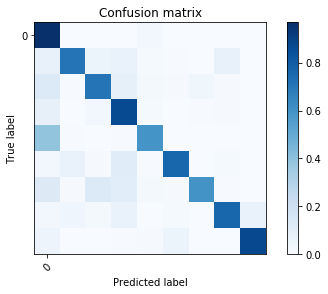

In [54]:
# Plot normalized confusion matrix (decision tree 80-20)
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=range(len(set(y))), normalize = True, title='Confusion matrix')